In [63]:
# Import Libraries

# Data Management
import pandas as pd
import numpy as np

# Plots
import matplotlib.pyplot as plt

# Statistics
import statsmodels.api as sm
from scipy.stats import norm

# Handle Files
import sys
import os

# Import Local Functions
sys.path.append(os.path.abspath("../source"))
from functions import import_daily_financial_data
from portfolios_toolkit import markowitz_weights

### Building a Portfolio ###

In [93]:
tickers = ['AAPL', 'AMZN', 'GOOGL', 'META', 'MSFT', 'NVDA', 'TSLA']

In [150]:
# DataFrame to store everything
returns_df = pd.DataFrame()

for ticker in tickers:
    df_stock = import_daily_financial_data(
        ticker=ticker, 
        start_date='2020-01-01', 
        end_date='2026-01-01', 
        returns=True
    )
    
    returns = df_stock['returns'].rename(ticker)
    
    returns_df = pd.concat([returns_df, returns], axis=1)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [151]:
returns_df

,AAPL,AMZN,GOOGL,META,MSFT,NVDA,TSLA
2020-01-03,-0.009770,-0.012213,-0.005245,-0.005305,-0.012530,-0.016135,0.029203
2020-01-06,0.007937,0.014776,0.026305,0.018658,0.002581,0.004185,0.019072
2020-01-07,-0.004714,0.002089,-0.001934,0.002161,-0.009159,0.012034,0.038067
2020-01-08,0.015958,-0.007839,0.007092,0.010087,0.015803,0.001874,0.048033
2020-01-09,0.021018,0.004788,0.010443,0.014210,0.012416,0.010923,-0.022189
...,...,...,...,...,...,...,...
2025-06-06,0.016265,0.026859,0.032001,0.018940,0.005757,0.012282,0.036014
2025-06-09,-0.012187,0.015840,0.014991,-0.005245,0.005026,0.006401,0.044531
2025-06-10,0.006038,0.002899,0.014153,0.011945,-0.003878,0.009282,0.055192
2025-06-11,-0.019380,-0.020474,-0.007023,-0.011829,0.003603,-0.007811,0.001042


In [152]:
# Portfolio's Expected Returns
expected_returns = returns_df.mean()
expected_returns.name = 'mean_returns'

expected_returns

AAPL     0.000738
AMZN     0.000592
GOOGL    0.000694
META     0.000877
MSFT     0.000834
NVDA     0.002332
TSLA     0.001761
Name: mean_returns, dtype: float64

In [153]:
# Covariance Matrix
covariance_matrix = returns_df.cov()

covariance_matrix

,AAPL,AMZN,GOOGL,META,MSFT,NVDA,TSLA
AAPL,0.000423,0.000285,0.000274,0.000333,0.000290,0.000423,0.000446
AMZN,0.000285,0.000520,0.000309,0.000408,0.000301,0.000467,0.000450
GOOGL,0.000274,0.000309,0.000429,0.000376,0.000292,0.000426,0.000383
META,0.000333,0.000408,0.000376,0.000814,0.000341,0.000535,0.000443
MSFT,0.000290,0.000301,0.000292,0.000341,0.000369,0.000454,0.000384
NVDA,0.000423,0.000467,0.000426,0.000535,0.000454,0.001182,0.000724
TSLA,0.000446,0.000450,0.000383,0.000443,0.000384,0.000724,0.001836


In [154]:
# Obtain Weights
p_weights = markowitz_weights(
    expected_returns, 
    covariance_matrix,
    0.0015
)

In [155]:
# Create a Portfolio Weights DF
portfolio_weights = pd.Series(
    p_weights,
    index = returns_df.columns,
    name = 'weights'
)

portfolio_weights

AAPL     0.152228
AMZN    -0.164563
GOOGL    0.126696
META    -0.026965
MSFT     0.446269
NVDA     0.398730
TSLA     0.067604
Name: weights, dtype: float64

In [156]:
# Portfolio Returns
portfolio_returns = returns_df @ p_weights
portfolio_returns.name = 'portfolio_returns'

portfolio_returns

2020-01-03   -0.010050
2020-01-06    0.005716
2020-01-07    0.001920
2020-01-08    0.015393
2020-01-09    0.011748
                ...   
2025-06-06    0.011501
2025-06-09    0.005384
2025-06-10    0.007614
2025-06-11   -0.001588
2025-06-12    0.009478
Name: portfolio_returns, Length: 1368, dtype: float64

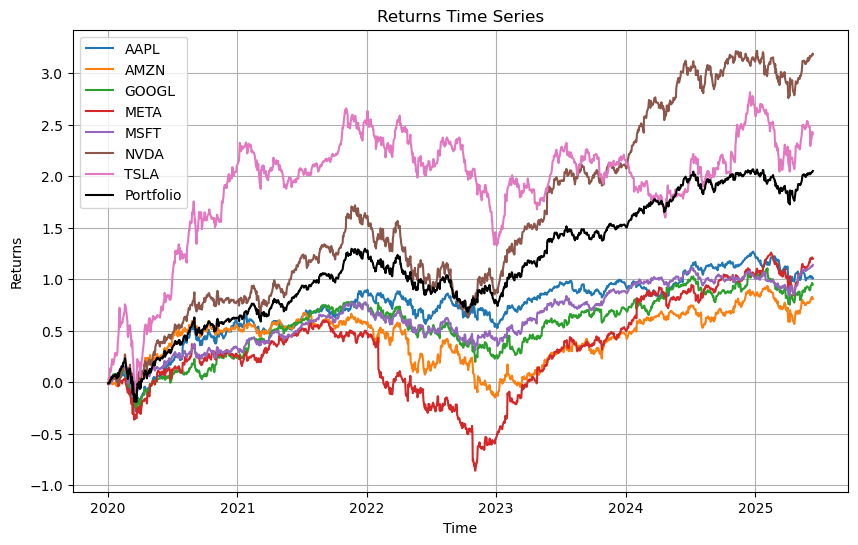

In [157]:
# Create Plot
plt.figure(figsize=(10, 6))
plt.plot(returns_df.cumsum(), label=returns_df.columns, alpha=1)
plt.plot(portfolio_returns.cumsum(), label='Portfolio', color='black', alpha=1)

# Config
plt.title('Returns Time Series')
plt.xlabel('Time')
plt.ylabel('Returns')
plt.legend()
plt.grid()

# Show
plt.show() 

### Obtaining a Benchmark: Using a Hypothetical Portfolio ###

In [158]:
# Get the returns of each stock of our portfolio but in the IWY
bench_weights = pd.Series(
    [5.88, 3.93, 2.02, 2.97, 6.86, 6.83, 1.78],
    index = returns_df.columns,
    name = 'weights'
)

bench_weights = bench_weights/100

# Normalized
norm_bench_weights = bench_weights/bench_weights.sum()

norm_bench_weights

AAPL     0.194252
AMZN     0.129832
GOOGL    0.066733
META     0.098117
MSFT     0.226627
NVDA     0.225636
TSLA     0.058804
Name: weights, dtype: float64

In [159]:
# Build the Benchmark Returns
benchmark_returns = returns_df @ norm_bench_weights
benchmark_returns.name = 'benchmark_returns'

benchmark_returns

2020-01-03   -0.009117
2020-01-06    0.009697
2020-01-07    0.002317
2020-01-08    0.010374
2020-01-09    0.010769
                ...   
2025-06-06    0.016834
2025-06-09    0.005377
2025-06-10    0.008127
2025-06-11   -0.008937
2025-06-12    0.004746
Name: benchmark_returns, Length: 1368, dtype: float64

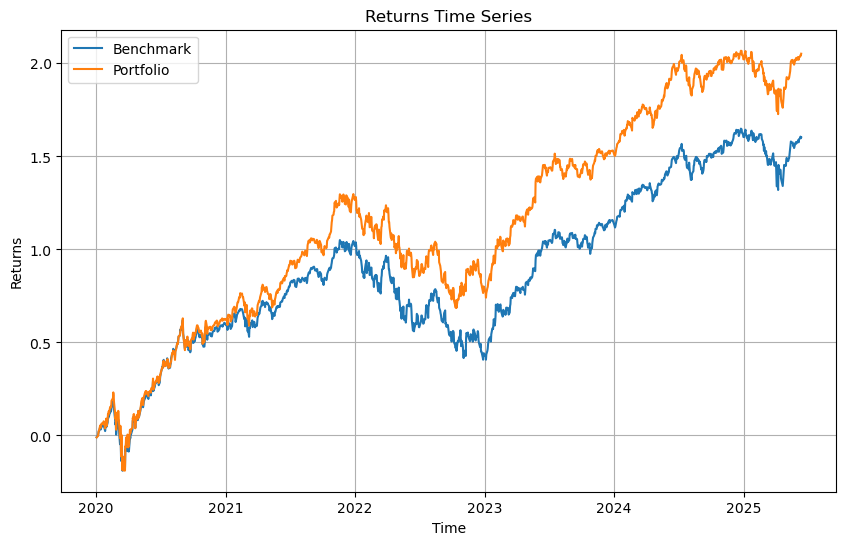

In [160]:
# Create Plot
plt.figure(figsize=(10, 6))
plt.plot(benchmark_returns.cumsum(), label='Benchmark', alpha=1)
plt.plot(portfolio_returns.cumsum(), label='Portfolio', alpha=1)

# Config
plt.title('Returns Time Series')
plt.xlabel('Time')
plt.ylabel('Returns')
plt.legend()
plt.grid()

# Show
plt.show() 

In [161]:
# Calculate the Mean Returns
portfolio_total_returns = portfolio_returns.cumsum().iloc[-1]
benchmark_total_returns = benchmark_returns.cumsum().iloc[-1]

print(portfolio_total_returns)
print(benchmark_total_returns)

2.051999999999998
1.602099510099593


In [162]:
# Calculate the Excess Returns
excess_returns = portfolio_total_returns - benchmark_total_returns

excess_returns

0.4499004899004049

In [163]:
# Create a Comparison DF
comparison_df = pd.DataFrame(index = returns_df.columns)
comparison_df['portfolio_weights'] = portfolio_weights
comparison_df['benchmark_weights'] = norm_bench_weights
comparison_df['stocks_returns'] = returns_df.cumsum().iloc[-1]
comparison_df['portfolio_returns'] = comparison_df['portfolio_weights'] * comparison_df['stocks_returns']
comparison_df['benchmark_returns'] = comparison_df['benchmark_weights'] * comparison_df['stocks_returns']

# The Alphas (Portfolio - Benchmark)
comparison_df['alphas'] = comparison_df['portfolio_returns'] - comparison_df['benchmark_returns']
comparison_df['weights_diff'] = comparison_df['portfolio_weights'] - comparison_df['benchmark_weights']

comparison_df

,portfolio_weights,benchmark_weights,stocks_returns,portfolio_returns,benchmark_returns,alphas,weights_diff
AAPL,0.152228,0.194252,1.009058,0.153607,0.196011,-0.042404,-0.042024
AMZN,-0.164563,0.129832,0.809589,-0.133228,0.105110,-0.238338,-0.294394
GOOGL,0.126696,0.066733,0.948888,0.120220,0.063322,0.056898,0.059963
META,-0.026965,0.098117,1.200192,-0.032363,0.117759,-0.150122,-0.125082
MSFT,0.446269,0.226627,1.140715,0.509066,0.258517,0.250549,0.219642
NVDA,0.398730,0.225636,3.189694,1.271826,0.719710,0.552117,0.173094
TSLA,0.067604,0.058804,2.409196,0.162871,0.141671,0.021201,0.008800


In [164]:
# Check the sum
comparison_df.sum()

portfolio_weights    1.000000e+00
benchmark_weights    1.000000e+00
stocks_returns       1.070733e+01
portfolio_returns    2.052000e+00
benchmark_returns    1.602100e+00
alphas               4.499005e-01
weights_diff        -5.273559e-16
dtype: float64

In [165]:
# Calculate the Brinson-Fachler Allocation Effect
allocation_effect = comparison_df['weights_diff'] * comparison_df['benchmark_returns']
allocation_effect.name = 'allocation_effect'

allocation_effect

AAPL    -0.008237
AMZN    -0.030944
GOOGL    0.003797
META    -0.014730
MSFT     0.056781
NVDA     0.124577
TSLA     0.001247
Name: allocation_effect, dtype: float64

In [166]:
# Calculate the Brinson-Fachler Selection Effect
selection_effect = comparison_df['portfolio_weights'] * comparison_df['alphas']
selection_effect.name = 'selection_effect'

selection_effect

AAPL    -0.006455
AMZN     0.039222
GOOGL    0.007209
META     0.004048
MSFT     0.111812
NVDA     0.220145
TSLA     0.001433
Name: selection_effect, dtype: float64

In [167]:
# Calculate the Brinson-Fachler Intersection Effect
interaction_effect = comparison_df['alphas'] - allocation_effect - selection_effect
interaction_effect.name = 'interaction_effect'

interaction_effect

AAPL    -0.027712
AMZN    -0.246616
GOOGL    0.045893
META    -0.139441
MSFT     0.081956
NVDA     0.207394
TSLA     0.018521
Name: interaction_effect, dtype: float64

In [168]:
# Calculate the Total Effect
bf_total_attribution = (
        allocation_effect + 
        selection_effect +
        interaction_effect
)

bf_total_attribution.name = 'bf_total_attribution'

bf_total_attribution

AAPL    -0.042404
AMZN    -0.238338
GOOGL    0.056898
META    -0.150122
MSFT     0.250549
NVDA     0.552117
TSLA     0.021201
Name: bf_total_attribution, dtype: float64

In [169]:
# Show
brinson_fachler_df = pd.DataFrame({
    'allocation': allocation_effect,
    'selection': selection_effect,
    'interaction': interaction_effect,
    'total': bf_total_attribution
})

brinson_fachler_df

,allocation,selection,interaction,total
AAPL,-0.008237,-0.006455,-0.027712,-0.042404
AMZN,-0.030944,0.039222,-0.246616,-0.238338
GOOGL,0.003797,0.007209,0.045893,0.056898
META,-0.014730,0.004048,-0.139441,-0.150122
MSFT,0.056781,0.111812,0.081956,0.250549
NVDA,0.124577,0.220145,0.207394,0.552117
TSLA,0.001247,0.001433,0.018521,0.021201


In [170]:
brinson_fachler_df.sum().round(6)

allocation     0.132492
selection      0.377414
interaction   -0.060006
total          0.449900
dtype: float64

In [171]:
# Divide the DataFrame by the Excess Return
norm_brinson_fachler_df = (brinson_fachler_df/brinson_fachler_df['total'].sum()) * 100

norm_brinson_fachler_df

,allocation,selection,interaction,total
AAPL,-1.830871,-1.434788,-6.159590,-9.425250
AMZN,-6.877928,8.717836,-54.815703,-52.975795
GOOGL,0.843962,1.602312,10.200625,12.646899
META,-3.273952,0.899758,-30.993658,-33.367852
MSFT,12.620838,24.852696,18.216373,55.689906
NVDA,27.689985,48.932029,46.097731,122.719745
TSLA,0.277105,0.318574,4.116667,4.712346


In [172]:
norm_brinson_fachler_df.sum().round(2)

allocation      29.45
selection       83.89
interaction    -13.34
total          100.00
dtype: float64

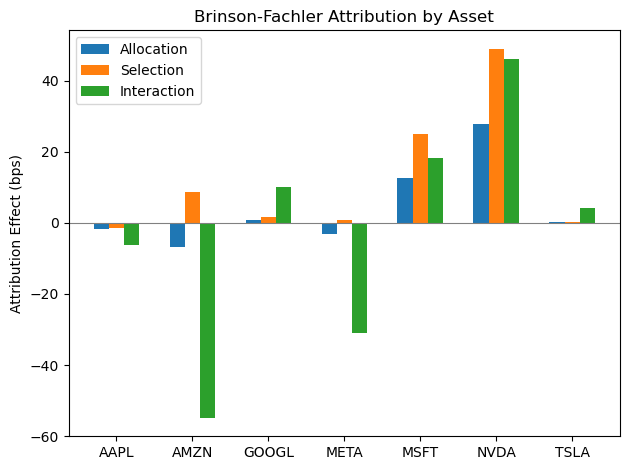

In [173]:
# Plotting individual attribution effects per asset
fig, ax = plt.subplots()

bar_width = 0.2
x = np.arange(len(norm_brinson_fachler_df))

# Plot each component
ax.bar(x - bar_width, norm_brinson_fachler_df["allocation"], width=bar_width, label="Allocation")
ax.bar(x, norm_brinson_fachler_df["selection"], width=bar_width, label="Selection")
ax.bar(x + bar_width, norm_brinson_fachler_df["interaction"], width=bar_width, label="Interaction")

# Formatting
ax.set_xticks(x)
ax.set_xticklabels(norm_brinson_fachler_df.index)
ax.set_ylabel("Attribution Effect (bps)")
ax.set_title("Brinson-Fachler Attribution by Asset")
ax.legend()
ax.axhline(0, color="gray", linewidth=0.8)

plt.tight_layout()
plt.show()